# APO Lab2

In [2]:
#from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, Math, Latex

# Histogram manipulation

**Cel**: poprawa jakości obrazu

Przykład:

![alt text](https://drive.google.com/uc?id=1HJbc7ljfEiwBN-RW3hZ5beBLei6zKVvA)

Histogram to jeden z graficznych sposobów przedstawiania rozkładu empirycznego cechy. Składa się z szeregu prostokątów umieszczonych na osi współrzędnych - czyli jest wykresem słupkowym.
W przypadku obrazów w skali szarości, gdzie kolory pikseli są opisane za pomocą jednej liczby (najczęściej w zakresie [0,255]), histogram pokazuje ile występuje elementów (pikseli) każdego z odcieni szarości. 

Obrazy o zawężonym histogramie często są trudne do interpretacji empirycznej bez wcześniejszej obróbki. Do tego typu obrazów stosuje się najczęściej normalizację lub equalizację histogramu w celu poprawy jego jakości (jak widać na rysunku powyżej).


TypeError: Image data cannot be converted to float

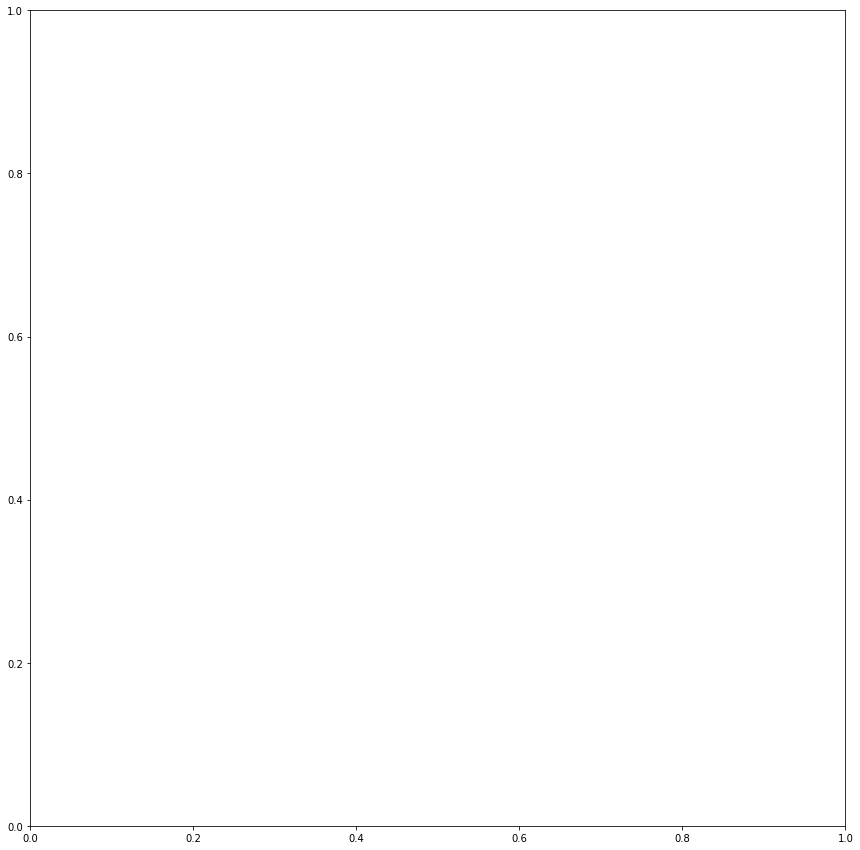

In [6]:
# load image with narrow histogram and show it (OpenCV)
img = cv2.imread('lena_low.bmp', cv2.IMREAD_GRAYSCALE)

#cv2_imshow(img)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print('Image shape: '+str(img.shape))

In [ ]:
# calculte histogram (no lib)

# init histogram array
my_hist =np.zeros(256)
# loop through image
for h in range(img.shape[0]):
  for w in range(img.shape[1]):
    #get pixel value
    current_pixel = img[h,w]
    #print(current_pixel)
    my_hist[current_pixel] += 1 # increase the value of histogram vecor correspondig to current pixel value


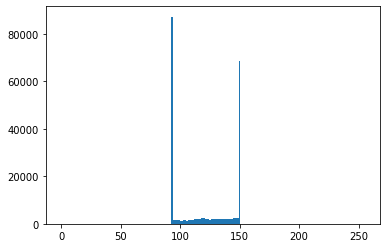

In [ ]:
# plot histogram
plt.bar(np.arange(256),my_hist, width=1); plt.show()

## Stretching

Wyrównanie histogramu dąży do ujednolicenia rozkładu pikseli we wszystkich dostępnych poziomach jasności, przez liniowe rościągnięcie histogramu.

Wzór:

![alt text](https://drive.google.com/uc?id=1AqraUHTvZjEIBJB9PJhNhWo70axOycJN)


In [ ]:
# define scaling range
im_min = np.min(img)
im_max = np.max(img)

new_max = 255
new_min = 0

In [ ]:
# calculate contrast stretching
img_stretch =np.zeros_like(img)
for h in range(img.shape[0]):
  for w in range(img.shape[1]):
    current_pixel = img[h,w]
    #print(current_pixel)
    img_stretch[h,w] = ((current_pixel-im_min)*new_max)/(im_max-im_min)

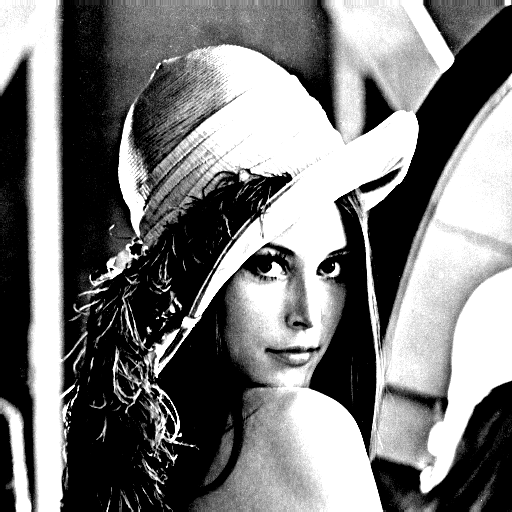

In [ ]:
# show resulting image

#cv2_imshow(img_stretch)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_stretch, cv2.COLOR_BGR2RGB))

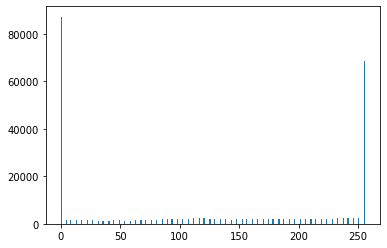

In [ ]:
# show histogram of resulting image
plt.hist(img_stretch.ravel(),256,[0,256]); plt.show()

In [ ]:
# OpenCV equivalent for comparison

# normalize float versions
norm_img1 = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
img_stretch_cv = (255*norm_img1).astype(np.uint8)

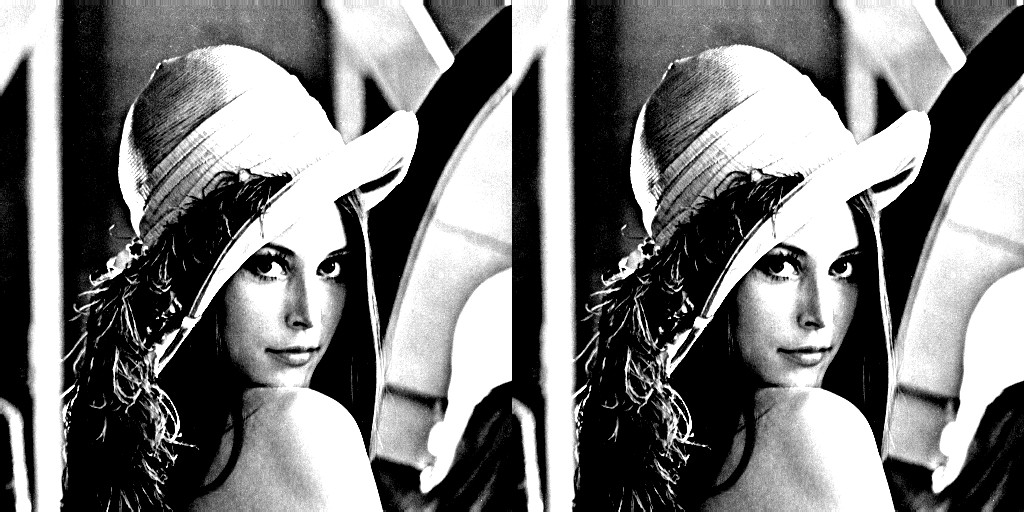

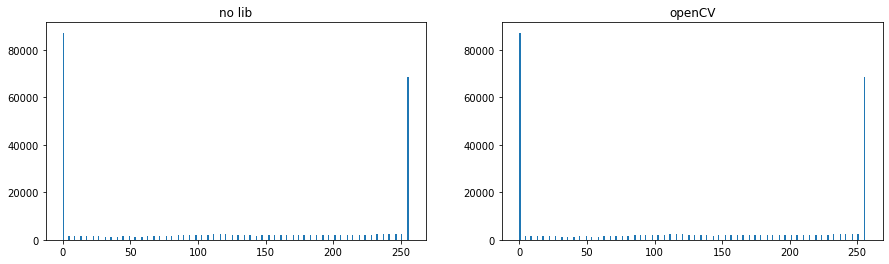

In [ ]:
# show comaprison
fig = plt.figure()
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(cv2.cvtColor(img_stretch, cv2.COLOR_BGR2RGB))
fig.add_subplot(2,2,2)
plt.imshow(cv2.cvtColor(img_stretch_cv, cv2.COLOR_BGR2RGB))


fig.add_subplot(2,2,3)
plt.title('no lib')
plt.hist(img_stretch.ravel(),256,[0,256])
fig.add_subplot(2,2,4)
plt.title('openCV')
plt.hist(img_stretch_cv.ravel(),256,[0,256])
plt.show()

## Equalization

Equlizacja histogramu: dąży do wyrównania występowania wszystkich jasności w obrazie w oparciu o rozciąganie histogramu kumulatywnego; uwydatnia szczegóły w obrazie


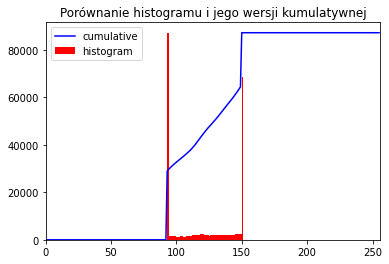

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cumulative','histogram'), loc = 'upper left')
plt.title('Porównanie histogramu i jego wersji kumulatywnej')
plt.show()

In [ ]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

In [ ]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

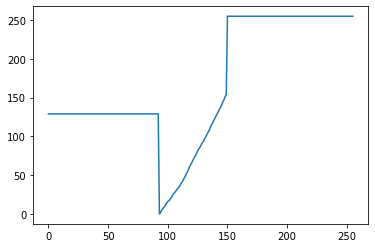

In [ ]:
# calculte cumsum for histogram 
cs = cumsum(my_hist)

#find the maximum and the minimum histogram value (excluding 0)
cs_m = np.ma.masked_equal(cs,0) # For masked array, all operations are performed on non-masked elements.
cs_min = cs_m.min()
cs_max = cs_m.max()

#cs_min = cs.min()
#cs_max = cs.max()

# normalize cumsum values to be between 0-255
cs = ((cs - cs_min) * 255 )/ (cs_max - cs_min)

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')
# display the result
plt.plot(cs)

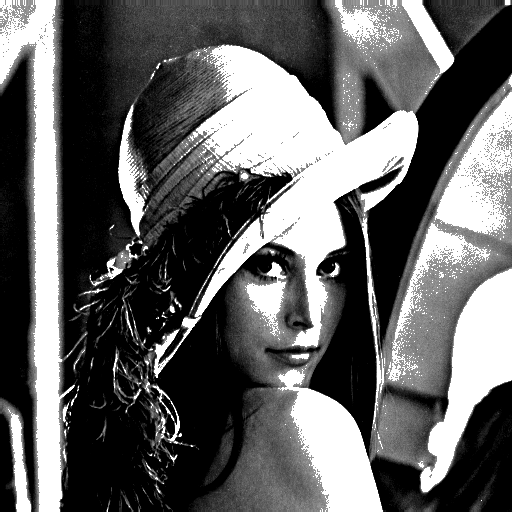

In [ ]:
# get the value from cumulative sum for every index in the image, and set that as img_eq
img_eq = cs[img]

# show resulting image 
#cv2_imshow(img_eq)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))

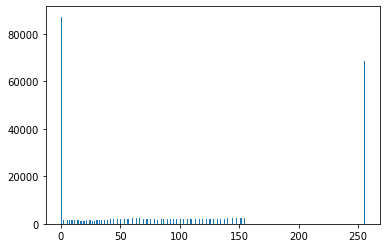

In [ ]:
# show histogram
plt.hist(img_eq.ravel(),256,[0,256]); plt.show()

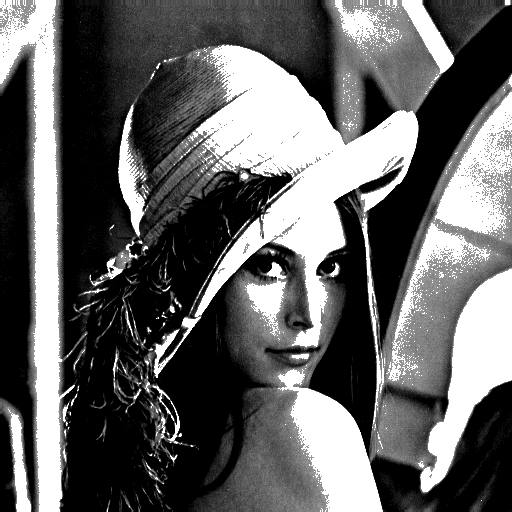

In [ ]:
# OpenCV equivalent for comparison
img_eq_cv = cv2.equalizeHist(img)

#cv2_imshow(img_eq_cv)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_eq_cv, cv2.COLOR_BGR2RGB))

#plt.hist(img_eq_cv.ravel(),256,[0,256]); plt.show()

NameError: name 'img_eq' is not defined

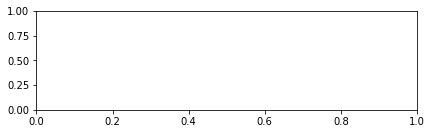

In [7]:
# show comaprison
fig = plt.figure()
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
fig.add_subplot(2,2,2)
plt.imshow(cv2.cvtColor(img_eq_cv, cv2.COLOR_BGR2RGB))

fig.add_subplot(1,2,3)
plt.title('no lib')
plt.hist(img_eq.ravel(),256,[0,256])
fig.add_subplot(1,2,4)
plt.title('openCV')
plt.hist(img_eq_cv.ravel(),256,[0,256])
plt.show()

Podsumowując, do zaimplementowania modyfikacji histogramu nie jest konieczne pobieranie od użytkownika dodatkowych informacji. Niezbędne jest wyliczenie histogramu oraz histogramu kumulatywnego w przypadu equalizacji. Zadanie to można w prosty sposób rozwiązać stosując pętle lub tablicę LUT. 

W efekcie otrzymujemy nowy obraz. Należy również pamiętać o odświeżeniu histogramu który najczęsciej ulega dużym zmianom przy tej operacji.

# Point operations

Przykładowe operacje punktowe jednoargumentowe

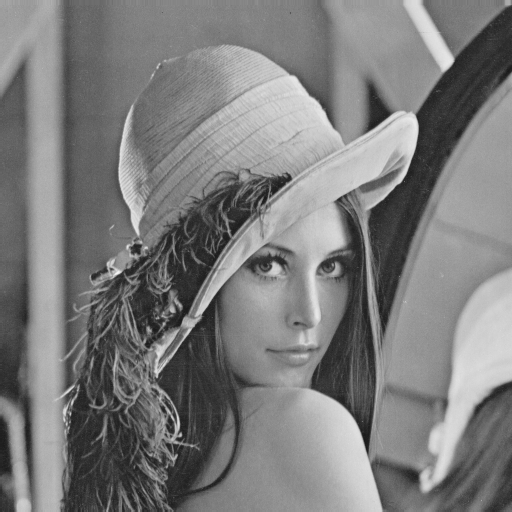

In [ ]:
# load image and show it (OpenCV)
img_gray = cv2.imread('lena_gray.bmp', cv2.IMREAD_GRAYSCALE)

#cv2_imshow(img_gray)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))

#print('Image shape: '+str(img.shape))

## Negation

Negacja czy zaprzeczenie obrazu, w najprostszy sposób można obliczyć odejmując wartości obrazu od maksymalnej wartości jasności zakresu.

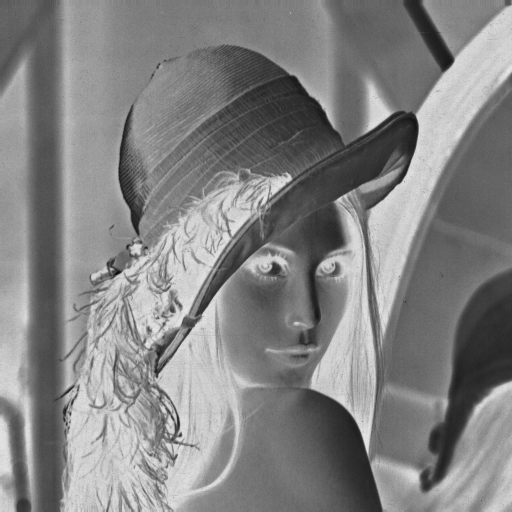

In [ ]:
img_inv = (255-img_gray)

#cv2_imshow(img_inv)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_inv, cv2.COLOR_BGR2RGB))

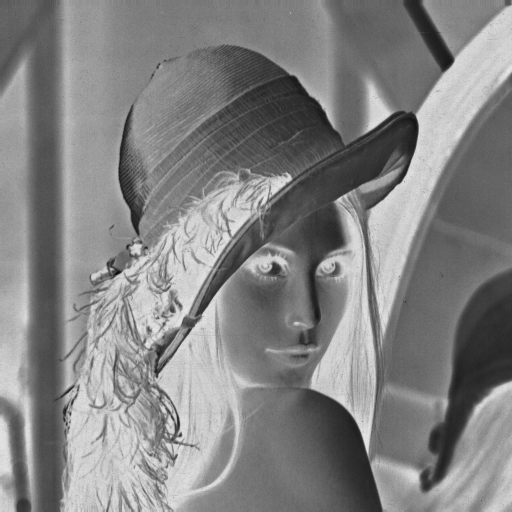

In [ ]:
img_inv_cv = cv2.bitwise_not(img_gray)

#cv2_imshow(img_inv_cv)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_inv_cv, cv2.COLOR_BGR2RGB))

Pisząc program należy pamiętać o tym, że obraz nie zawsze musi być w zakresie wartości [0,255]. 

Warto zwrócić uwagę na typ zmiennej.

In [ ]:
# type of image used so far
print(img_gray.dtype)

uint8


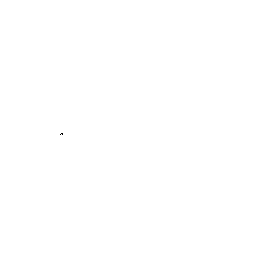

In [ ]:
# load image in different type
img2 = cv2.imread('camera16.tif', cv2.IMREAD_UNCHANGED).astype('float16')

#cv2_imshow(img2)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
# why is it all white? let's look at the values.
img2[0:8,0:8]

array([[40540., 40540., 40540., 40540., 40540., 40540., 40540., 40540.],
       [46180., 40540., 40540., 40540., 40540., 40540., 40540., 40540.],
       [40540., 40540., 40540., 40540., 40540., 40540., 40540., 40540.],
       [46180., 40540., 40540., 40540., 40540., 40540., 40540., 40540.],
       [40540., 40540., 40540., 40540., 40540., 40540., 40540., 40540.],
       [40540., 40540., 40540., 40540., 40540., 40540., 40540., 40540.],
       [40540., 40540., 40540., 40540., 40540., 40540., 40540., 40540.],
       [40540., 40540., 40540., 40540., 40540., 40540., 40540., 46180.]],
      dtype=float16)

float16


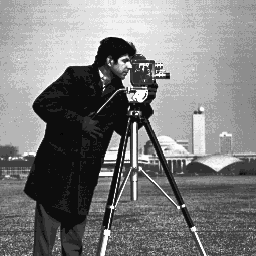

In [ ]:
# scale the imege for display
print(img2.dtype)

#cv2_imshow(img2/255)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img2/255, cv2.COLOR_BGR2RGB))

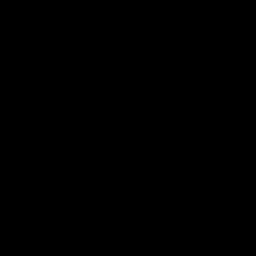

array([[-40300., -40300., -40300., -40300., -40300.],
       [-45920., -40300., -40300., -40300., -40300.],
       [-40300., -40300., -40300., -40300., -40300.],
       [-45920., -40300., -40300., -40300., -40300.],
       [-40300., -40300., -40300., -40300., -40300.]], dtype=float16)

In [ ]:
# image negaton as performed previously -> results in all black image because the max value for float 16 is much higher than 255
img_inv2A = (np.float16(255)-img2)

#cv2_imshow(img_inv2A/255)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_inv2A/255, cv2.COLOR_BGR2RGB))

img_inv2A[0:5,0:5]

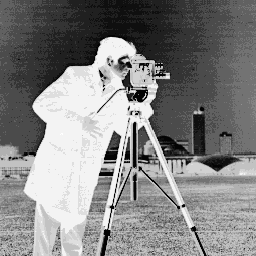

array([[24960., 24960., 24960., 24960., 24960.],
       [19330., 24960., 24960., 24960., 24960.],
       [24960., 24960., 24960., 24960., 24960.],
       [19330., 24960., 24960., 24960., 24960.],
       [24960., 24960., 24960., 24960., 24960.]], dtype=float16)

In [ ]:
#image in float16 negation
img_inv2B = (np.float16(np.finfo(img2.dtype).max)-img2) #MAX VLAUE np.float16: 65500

#cv2_imshow(img_inv2B/255)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_inv2B/255, cv2.COLOR_BGR2RGB))

img_inv2B[0:5,0:5]

Do wykonania negacji nie są potrzebne dodatkowe parametry, ale warto zwrócić uwagę na typ zmiennej przetwarzanego obrazu.
W wyniku tej operacji otrzymujemy obraz o tym samym rozmiarze.

## Thresholding / Progowanie


Algorytm progowania realizuje prostą zależność gdzie wartości powyżej ustalonego progu przyjmują wartośc 1 (lub 255) a wartości poniżej wartość 0. 

![alt text](https://drive.google.com/uc?id=1GATU-YVHAwc69AOLh4xD8Ci8Nmaa7OUa)

W efekcie otrzymujemy binarny obraz.

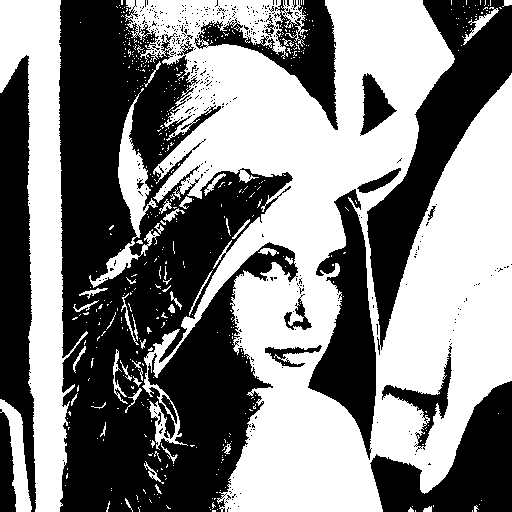

In [ ]:
# manual setting of thresh value
myThresh = 127

# init output image 
img_th = np.zeros_like(img_gray)
# loop through image
for h in range(img_gray.shape[0]):
  for w in range(img_gray.shape[1]):
    current_pixel = img_gray[h,w]
    #print(current_pixel)
    if (current_pixel>myThresh): img_th[h,w]=1 # thresholding condition

# display output
#cv2_imshow(img_th*255)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_th*255, cv2.COLOR_BGR2RGB))

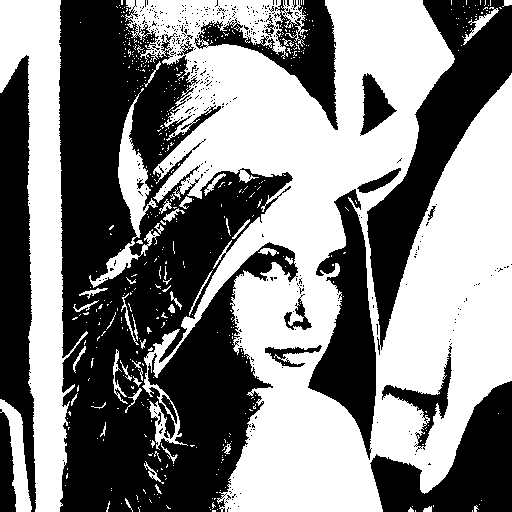

In [ ]:
# ręczne ustawienie progu 
myThresh = 127
# progowanie z powyższyą wartością progu
ret,img_th_binary = cv2.threshold(img_gray,myThresh,255,cv2.THRESH_BINARY)

#cv2_imshow(img_th_binary)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_th_binary, cv2.COLOR_BGR2RGB))

W programie zaliczenowym należy dać możliwość użytkownikowi interaktywnego doboru progu (najlepiej z aktywnym podglądem, czyli odświeżaniem obrazu po zmianie wartości progu). Przyład implementacji poniżej z zastosowaniem suwaka (slider) do przyjęcia wartości progu od użytkowanika.

Wybrana wastość progu: 58


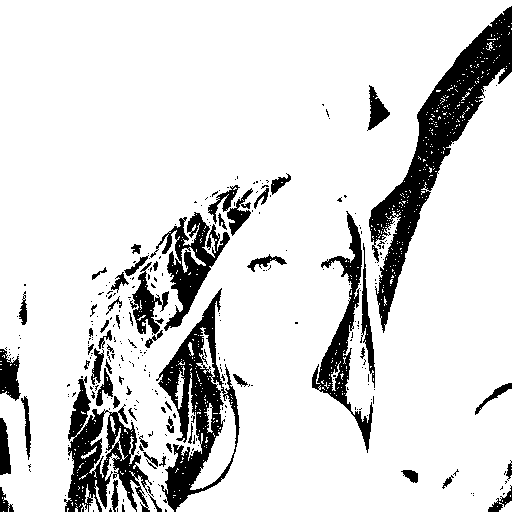

In [ ]:
#@title Progowanie { run: "auto" }

slider_threshold_value = 58 #@param {type:"slider", min:0, max:255, step:1}


print("Wybrana wastość progu: " + str(slider_threshold_value))

# progowanie z powyższyą wartością progu
ret,img_th_binary2 = cv2.threshold(img_gray,slider_threshold_value,255,cv2.THRESH_BINARY)

#cv2_imshow(img_th_binary2)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_th_binary2, cv2.COLOR_BGR2RGB))


## Posterize

Redukcja poziomów szarości przez posteryzację. Polega na równomiernym rozłożeniu zakresów jasności które są ujednolicane do wspólnej wartości. Na przykład dla 2 poziomów posteryzacja odpowiada binaryzacji z progiem 127. 

Realizacja tej metody przez UOP przyjmuje postać wykresu schodkowego (jak na rysunku poniżej).

![alt text](https://drive.google.com/uc?id=16cBQDDKc9g-3X29nvK8FAGLV9rbiqeAx)


In [ ]:
myPosterizeBinsNum = 8


print('my number of Bins: '+str(np.round(255/myPosterizeBinsNum))) 
print('my Bin length: '+str(np.round(255/myPosterizeBinsNum))) 
print('my Posterization Bins: '+str(np.arange(0,255,np.round(255/myPosterizeBinsNum))))

my number of Bins: 32.0
my Bin lenth: 32.0
my Posterization Bins: [  0.  32.  64.  96. 128. 160. 192. 224.]


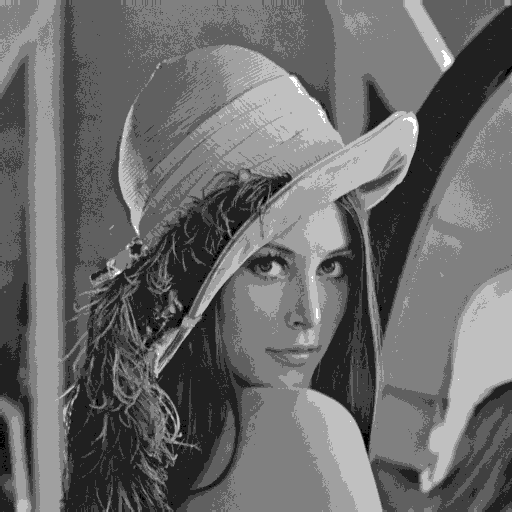

In [ ]:
# calc size of binning
myBins = np.arange(0,255,np.round(255/myPosterizeBinsNum))

#init output image
img_pstrz = np.zeros_like(img_gray)
# loop through image
for h in range(img_gray.shape[0]):
  for w in range(img_gray.shape[1]):
    current_pixel = img_gray[h,w]

    # loop through bins
    for bin in range(myPosterizeBinsNum-1):
      #print(myBins[bin])
      if (current_pixel>myBins[bin]): img_pstrz[h,w]=myBins[bin] # if inside bin assign value

    if (current_pixel>myBins[-1]): img_pstrz[h,w]=255 # last bin -> fill with max value

# display output image
#cv2_imshow(img_pstrz)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_pstrz, cv2.COLOR_BGR2RGB))

## Posterize with LUT

In [ ]:
# init LUT
bin_length = np.round(255/myPosterizeBinsNum).astype(int)
lut_pstrz = []

# popualte LUT
for bin in range(myPosterizeBinsNum-1):
  temp = np.ones(bin_length,)*myBins[bin] #temp vector
  lut_pstrz = np.hstack((lut_pstrz, temp)) #concatenate
lut_pstrz = np.hstack((lut_pstrz, np.ones(bin_length,)*255)) #last bin 

lut_pstrz.shape # check LUT size

(256,)

In [ ]:
# show LUT
lut_pstrz

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  64.,  64.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  96.,  96.,  96.,
        96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,
        96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,
        96.,  96.,  96.,  96.,  96.,  96.,  96., 128., 128., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 12

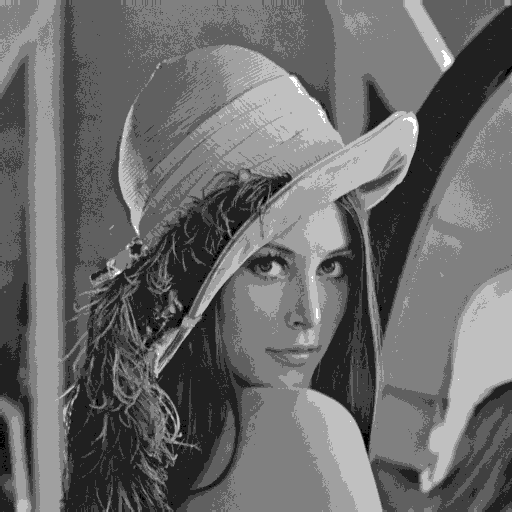

In [ ]:
# apply LUT
img_pstrz2 = lut_pstrz[img_gray]

#cv2_imshow(img_pstrz2)
#plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_pstrz2, cv2.COLOR_BGR2RGB))

Podsumowując, do zaimplementowania operacji punktowych często jest konieczne pobieranie od użytkownika dodatkowych wartości parametrów. Można to rozwiązać jako pole do wpisywania wartości lub suwak ograniczający możliwość wyboru wartości. Operacje punktowe mają swoje odniesienie w UOP a co za tym idzie można w prosty sposób rozwiązać stosując tablicę LUT. 